In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [22]:
market_df = pd.read_csv('medical_stock_prices.csv', index_col='Date', parse_dates=True)
LPNT = market_df[['LPNT']]

In [9]:
market_df.tail()

,BKD,CSU,CYH,FVE,KND,LPNT,NHC,SEM
Date,,,,,,,,
2014-12-23,36.23,24.98,54.99,4.06,16.548558,72.78,59.734000,14.295120
2014-12-24,36.16,25.08,55.36,4.03,16.649129,74.35,59.518557,14.563154
2014-12-26,36.35,25.11,55.09,4.05,16.969129,74.05,60.267925,14.821260
2014-12-29,36.65,25.14,54.95,4.07,16.713129,73.79,60.305393,14.702134
2014-12-30,36.86,25.41,54.92,4.08,16.841129,73.57,60.004055,14.583008


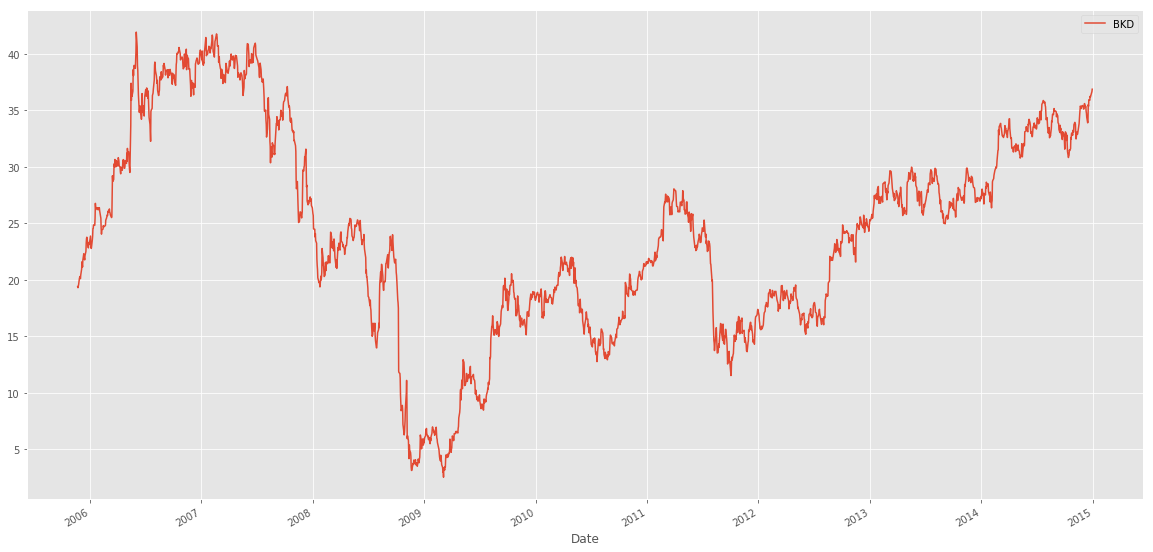

In [11]:
BKD.plot()

In [23]:
df = LPNT.reset_index().rename(columns={'Date':'ds', 'LPNT':'y'})
df['y'] = np.log(df['y'])

In [24]:
model = Prophet()
model.fit(df);
future = model.make_future_dataframe(periods=365) #forecasting for 1 year from now.
forecast = model.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


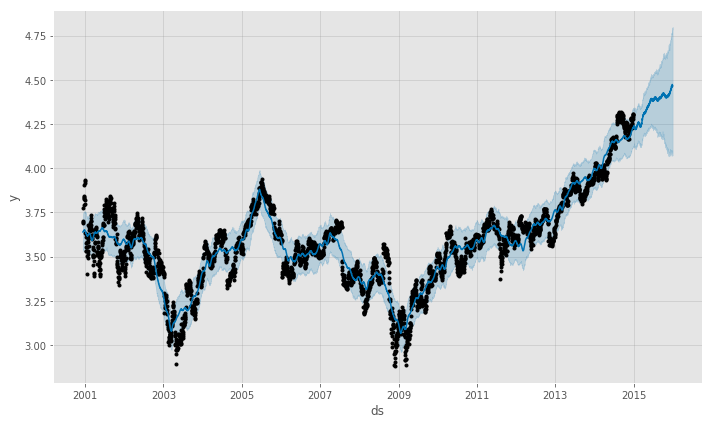

In [25]:
figure=model.plot(forecast)